# Importing sibilla

In [1]:
import sibilla

# Configuring simulation

In [10]:
sibilla_runtime = sibilla.SibillaRuntime()
sibilla_runtime.load_module("population")
sibilla_runtime.load_from_file("seir.pm")
sibilla_runtime.set_configuration("init")
sibilla_runtime.add_all_measures()
sibilla_runtime.set_deadline(100)
sibilla_runtime.set_dt(1.0)
sibilla_runtime.set_replica(100)

# Starting simulation

In [13]:
res = sibilla_runtime.simulate("")

Dec 24, 2021 1:34:30 AM it.unicam.quasylab.sibilla.core.simulator.SimulationEnvironment simulate
INFO: The simulation has concluded with success


# Plotting Results

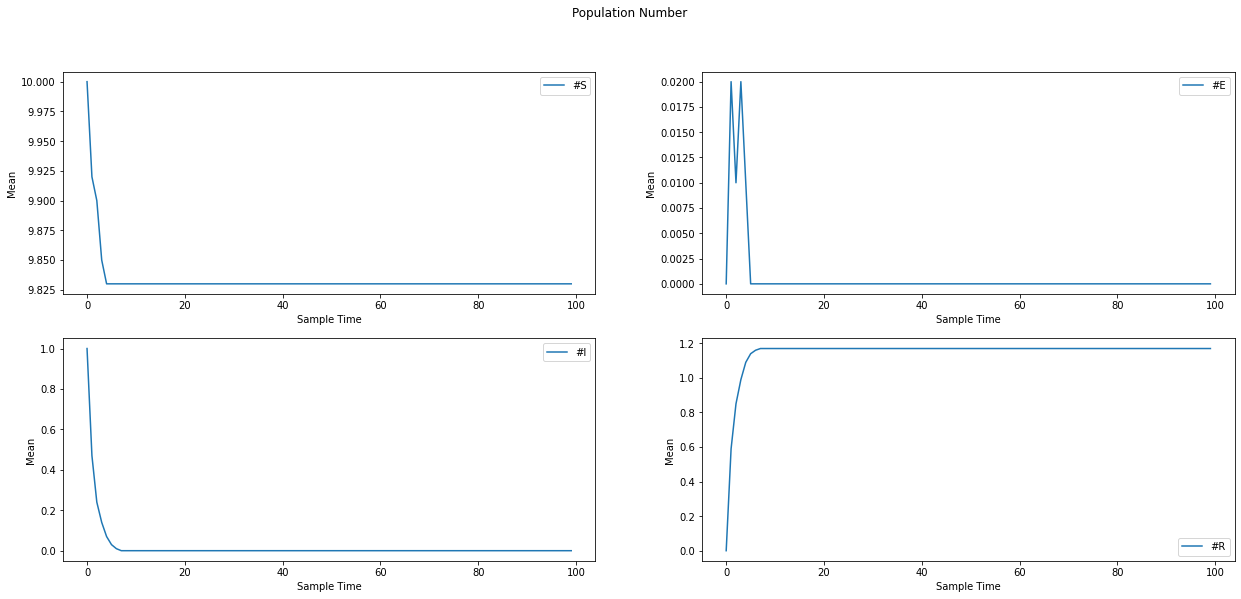

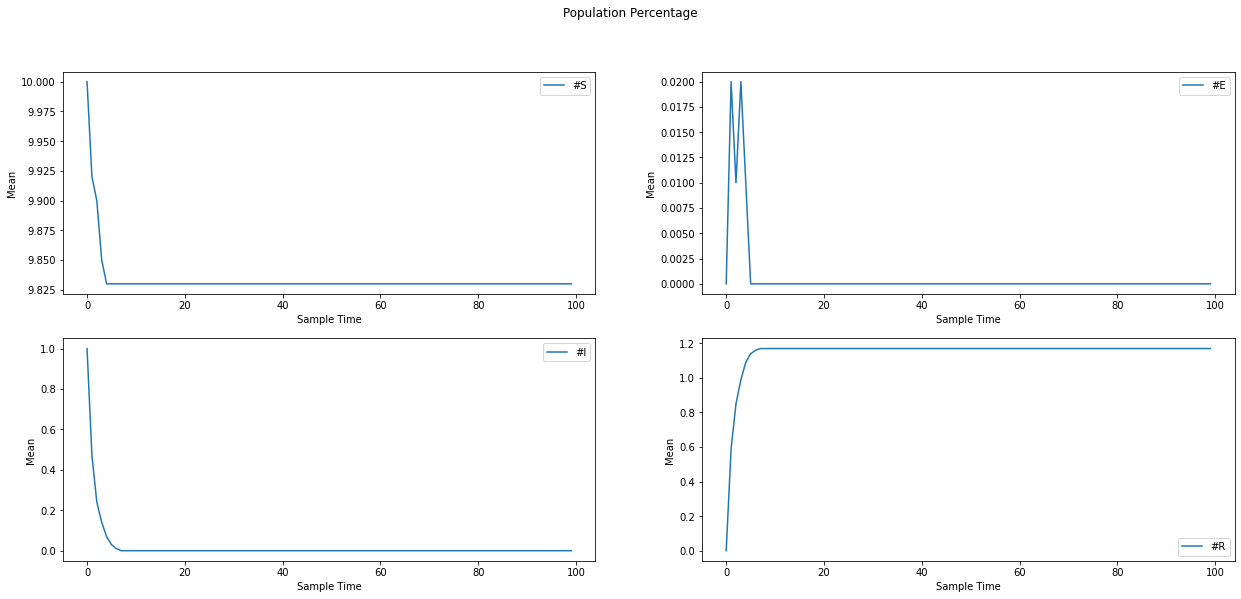

In [58]:
import matplotlib.pyplot as plt

def plot(title, keys, res):
    fig = plt.figure(figsize=(21, 9))
    fig.suptitle(title)
    for i, k in enumerate(keys):
        c_plot = fig.add_subplot(2, 2, i+1)
        c_plot.plot(
            [l[0] for l in res[k]], 
            [l[1] for l in res[k]], 
            label = k
        )
        c_plot.set_ylabel("Mean")
        c_plot.set_xlabel("Sample Time")
        c_plot.legend()
    fig.show()


plot('Population Number', ["#S", "#E", "#I", "#R"], res)
plot('Population Percentage', ["%S", "%E", "%I", "%R"], res)

# Saving results

In [6]:
sibilla_runtime.save("results", "seir", "__")